<a href="https://colab.research.google.com/github/Iamjohnko/Logistic-Regression-Project/blob/main/EXPLORATORY_ANALYSIS_OF_SUPERMARKET_SALES.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# DESCRIPTIVE STATISTICS

In [25]:
df.groupby('Branch')['Quantity'].describe().T.style.background_gradient()

Branch,A,B,C
count,340.000000,332.000000,328.000000
mean,5.467647,5.481928,5.582317
std,2.859876,2.896446,3.021724
min,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000
50%,5.000000,5.000000,6.000000
75%,8.000000,8.000000,8.000000
max,10.000000,10.000000,10.000000


In [27]:
df.groupby('Product line')['Rating'].describe().style.background_gradient()

,count,mean,std,min,25%,50%,75%,max
Product line,,,,,,,,
Electronic accessories,170.000000,6.924706,1.702028,4.000000,5.500000,6.700000,8.350000,10.000000
Fashion accessories,178.000000,7.029213,1.713437,4.000000,5.600000,6.950000,8.500000,9.900000
Food and beverages,174.000000,7.113218,1.715181,4.000000,5.800000,7.300000,8.600000,9.900000
Health and beauty,152.000000,7.003289,1.763817,4.000000,5.450000,7.200000,8.400000,10.000000
Home and lifestyle,160.000000,6.837500,1.718627,4.100000,5.400000,7.000000,8.200000,9.900000
Sports and travel,166.000000,6.916265,1.714477,4.000000,5.525000,6.700000,8.450000,10.000000


In [ ]:
df.groupby('Gender')['Quantity'].describe()

In [26]:
df.tail().style.background_gradient()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.350000,1,2.017500,42.367500,1/29/2019,13:46,Ewallet,40.350000,4.761905,2.017500,6.200000
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.380000,10,48.690000,1022.490000,3/2/2019,17:16,Ewallet,973.800000,4.761905,48.690000,4.400000
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.840000,1,1.592000,33.432000,2/9/2019,13:22,Cash,31.840000,4.761905,1.592000,7.700000
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.820000,1,3.291000,69.111000,2/22/2019,15:33,Cash,65.820000,4.761905,3.291000,4.100000
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.340000,7,30.919000,649.299000,2/18/2019,13:28,Cash,618.380000,4.761905,30.919000,6.600000


In [4]:
df.shape

(1000, 17)

## **Uni-variate analysis**


# Question 1: What does the customer rating look like and is it skewed?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


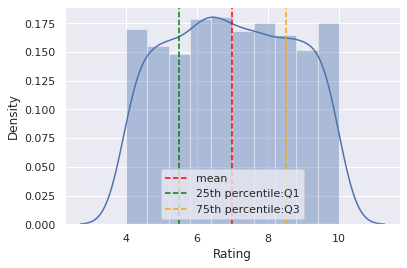

In [29]:
sns.distplot(df['Rating'])
plt.axvline(x=np.mean(df['Rating']), c='red', ls='--', label='mean')
plt.axvline(x=np.percentile(df['Rating'],25),c='green', ls='--', label = '25th percentile:Q1')
plt.axvline(x=np.percentile(df['Rating'],75),c='orange', ls='--',label = '75th percentile:Q3' )
plt.legend()

### **Findings**

Ans: The rating distribution looks uniform and there seems to be no skewness on the left or right side of the distribution. We can plot the mean and the percentiles to show this as well. The red dotted lime is the mean and the green and orange lines indicate the 25th and 75th percentiles respectively.The mean rating is ~7 across products.

# Question 2: Is there any difference in aggregate sales across branches?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


A    340
B    332
C    328
Name: Branch, dtype: int64

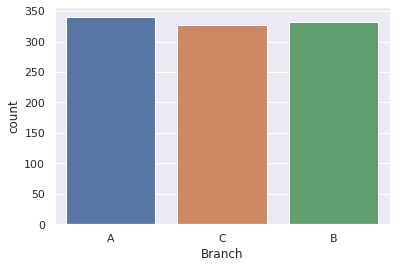

In [34]:
sns.countplot(df['Branch'])
df['Branch'].value_counts()

Ans: There is not much difference in sales across the 3 branches of A, B and C. The sales in branch A is a bit higher than the rest of the branches.

# Question 3: Which is the most pouplar payment method used by customers?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


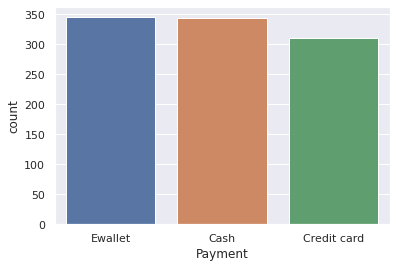

In [8]:
sns.countplot(df['Payment'])

Ans: The most popular payment method is in-fact E-wallet and not credit cards.Cash payment is also popular.

## **`Bi-variate analysis`**




# Question 4: Which branch is the most profitable?

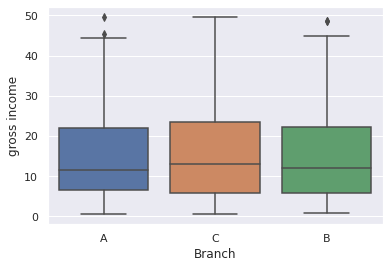

In [9]:
sns.boxplot(x=df['Branch'], y=df['gross income'])

Ans: Gross income is similar for both male and female, though female customers spend a bit higher at the 75th percentile.


# Question 5: Is there any time trend in gross income?


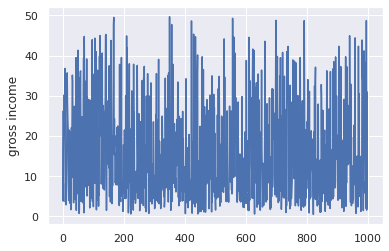

In [10]:
sns.lineplot(x= df.groupby(df.index).mean().index, 
             y = df.groupby(df.index).mean()['gross income'])

Ans: No particular time trend is observed except for some days when the gross income is pretty high or pretty low. Overall it remains at a certain average level.


# Question 6: Which product line generates most income?



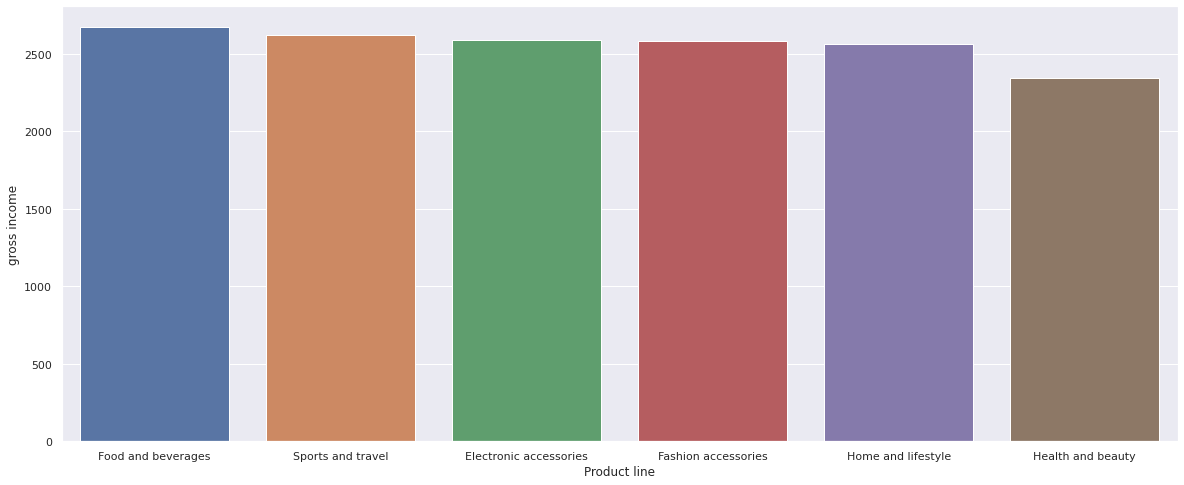

In [33]:
cat=df[["Product line", "gross income"]].groupby(['Product line'], as_index=False).sum().sort_values(by='gross income', ascending=False)
plt.figure(figsize=(20,8))
sns.barplot(x='Product line', y='gross income', data=cat)

## Ans: Gross income is highest in sports and travel.

# Correlation analysis

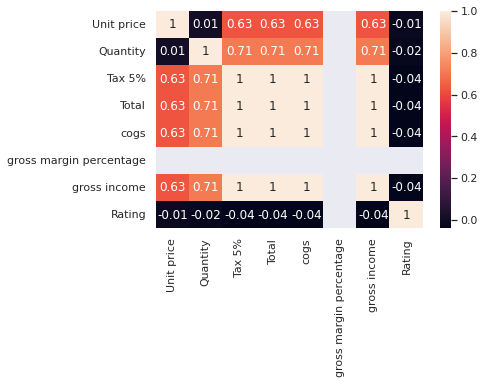

In [12]:
sns.heatmap(np.round(df.corr(),2), annot=True)

Unit price is positively correlated to cogs with 63% correlation. Another interesting observation is that ‘Ratings’ hardly has any correlation with any other variables.

# Question 7: What is the spending pattern of females and males and in which category do they spend a lot?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


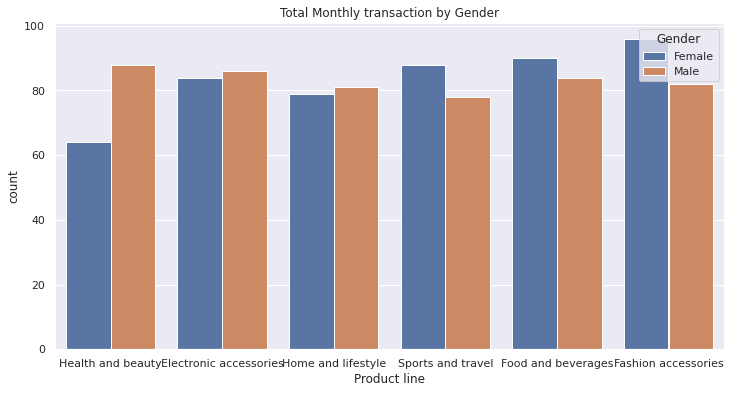

In [23]:
plt.figure(figsize=(12, 6))
plt.title('Total Monthly transaction by Gender')
sns.countplot(df['Product line'], hue = df.Gender)

Ans: Females spend on 'fashion accessories' the most and for males it is 'Health and beauty'. Females also spend more on 'Sports and travel'.

# Question 8: How many products are bought by customers?

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


([<matplotlib.axis.XTick at 0x7f7039d245d0>,
 <a list of 10 Text major ticklabel objects>)

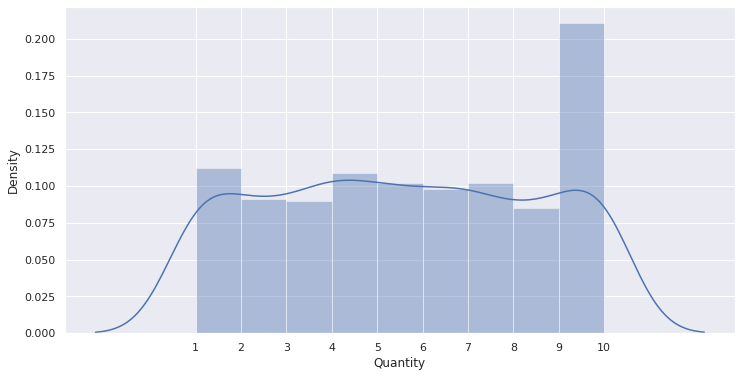

In [24]:
xdata = [1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (12,6))
sns.distplot(df['Quantity'])
plt.xticks(xdata)

Ans: Most of the customers buy 10 quantities.

# Question 9: Which hour of the day is the busiest?

Text(0.5, 1.0, 'Product Sales per Hour')

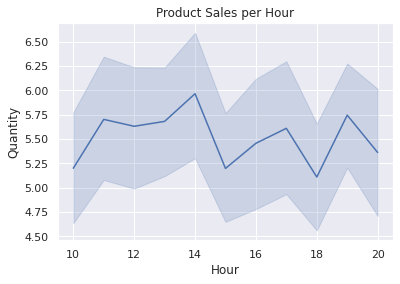

In [38]:
df['Time'] = pd.to_datetime(df['Time'])
df['Hour'] = (df['Time']).dt.hour
df['Hour'].unique()

sns.lineplot(x="Hour",  y = 'Quantity',data =df).set_title("Product Sales per Hour")

# Question 10: Which product line should the supermarket focus on?

([<matplotlib.axis.XTick at 0x7f70393c60d0>,
 <a list of 11 Text major ticklabel objects>)

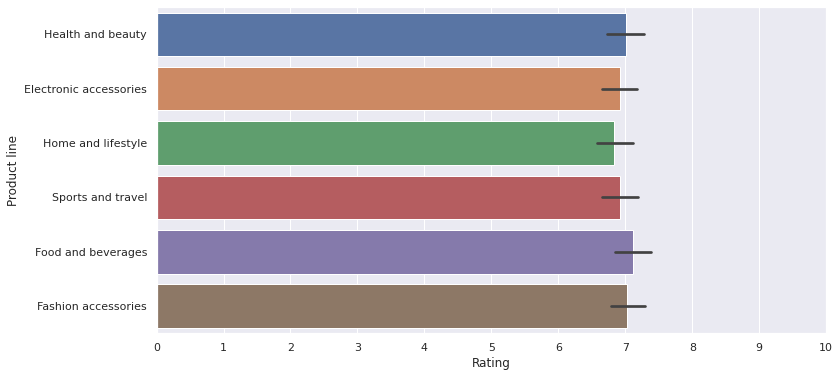

In [39]:
xdata = [0,1,2,3,4,5,6,7,8,9,10]
plt.figure(figsize = (12,6))
sns.barplot(y = df['Product line'], x = df['Rating'])
plt.xticks(xdata)

# Question 11: Which city should be chosen for expansion and which products should it focus on?

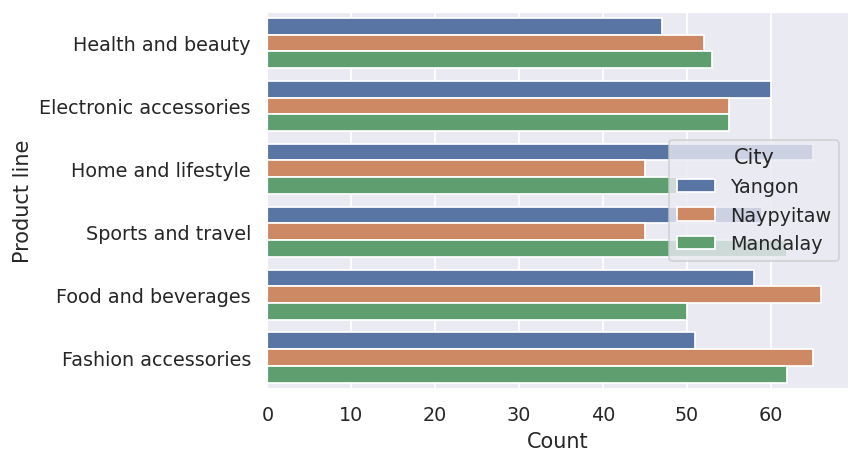

In [40]:
plt.figure(dpi=125)
sns.countplot(y ='Product line', hue = "City", data = df) 
plt.xlabel('Count')
plt.show()

Ans: Fashion accessories and food and beverages are the most sold product in Naypyitaw and these products should be focused on for expansion along with electronic accessories.